In [1]:
### Find liklihood of next credit card payment
#
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time


from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load data set
df = pd.read_excel("default of credit card clients.xls", index_col=0, skiprows=[1])
df.apply(pd.to_numeric)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.dtypes

X1     int64
X2     int64
X3     int64
X4     int64
X5     int64
X6     int64
X7     int64
X8     int64
X9     int64
X10    int64
X11    int64
X12    int64
X13    int64
X14    int64
X15    int64
X16    int64
X17    int64
X18    int64
X19    int64
X20    int64
X21    int64
X22    int64
X23    int64
Y      int64
dtype: object

In [4]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
print(df.shape)
df = df.dropna()
print(df.shape)


(30000, 24)
(30000, 24)


In [6]:
# How balanced is the data?
pd.value_counts(df.Y)

0    23364
1     6636
Name: Y, dtype: int64

In [7]:
# We have unbalanced data
# with Paid = 23364 and Didn't pay = 6636

<h1>Feature Predication Section<h1>

In [8]:
#
#
cols = df.columns[0:-1]
X_train, X_test, y_train, y_test = train_test_split(df[cols],df["Y"], test_size=0.10, random_state=42)
print("Training rows are ", X_train.shape[0])
print("Test rows are", X_test.shape[0])


Training rows are  27000
Test rows are 3000


In [9]:
#
# Undersample our TRAIN data (not text)
#from imblearn.under_sampling import ClusterCentroids
#cc = ClusterCentroids()
#X_train, y_train = cc.fit_sample(X_train, y_train)

In [10]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
#X_train, y_train = rus.fit_sample(X_train, y_train)
print("RandomUnderSmpler")
print(y_train.value_counts())

RandomUnderSmpler
0    21023
1     5977
Name: Y, dtype: int64


In [11]:
def print_result(y_test, y_pred):
    print("Confusion Matrix: ")
    print(confusion_matrix(y_test, y_pred)) 
    print ("Accuracy : ", accuracy_score(y_test,y_pred)*100) 
    print("Report : ")
    print(classification_report(y_test, y_pred))  


def plotaoc(ax, lr_probs, t, name, colour):
    # keep probabilities for the positive outcome only
    r,c = lr_probs.shape
    if (c == 2):
        lr_probs = lr_probs[:, 1]
    # calculate scores
    lr_auc = roc_auc_score(y_test, lr_probs)
    # summarize scores
    #print('Logistic: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    ax.plot(lr_fpr, lr_tpr, marker='.', label='%s %.3f (%.2fs)'%(name, lr_auc, t), color=colour)

    # show the legend
    ax.legend()
    # show the plot
    #pyplot.show()    


In [12]:
# Decision Treee using Gini
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

start = time.time()
model_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)
model_gini.fit(X_train, y_train)
time_gini = time.time() - start
y_pred = model_gini.predict(X_test)
print_result(y_test, y_pred)


Confusion Matrix: 
[[2222  119]
 [ 417  242]]
Accuracy :  82.13333333333334
Report : 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2341
           1       0.67      0.37      0.47       659

    accuracy                           0.82      3000
   macro avg       0.76      0.66      0.68      3000
weighted avg       0.80      0.82      0.80      3000



In [13]:
# Decision Treee using Entropy
start = time.time()
model_dt = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=3, min_samples_leaf=5)
model_dt.fit(X_train, y_train)
time_dt = time.time() - start
y_pred = model_dt.predict(X_test)
print_result(y_test, y_pred)



Confusion Matrix: 
[[2222  119]
 [ 417  242]]
Accuracy :  82.13333333333334
Report : 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2341
           1       0.67      0.37      0.47       659

    accuracy                           0.82      3000
   macro avg       0.76      0.66      0.68      3000
weighted avg       0.80      0.82      0.80      3000



In [14]:
# Combine into one data frame
cdf = pd.DataFrame(model_dt.feature_importances_)
colname = "DT %.2f"%(100.0*accuracy_score(y_test,y_pred))
cdf.columns = [colname]


In [15]:
# Random forest (i.e. best of many randomly chosen decision trees)
start = time.time()
model_rfc = RandomForestClassifier(criterion = "entropy", random_state = 100)
model_rfc.fit(X_train, y_train)
time_rfc = time.time() - start
y_pred = model_rfc.predict(X_test)
#print(y_pred)
print_result(y_test, y_pred)
colname = "RF %.2f"%(100.0*accuracy_score(y_test,y_pred))
cdf[colname] = model_rfc.feature_importances_

Confusion Matrix: 
[[2210  131]
 [ 412  247]]
Accuracy :  81.89999999999999
Report : 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      2341
           1       0.65      0.37      0.48       659

    accuracy                           0.82      3000
   macro avg       0.75      0.66      0.68      3000
weighted avg       0.80      0.82      0.80      3000



In [16]:
# let's try XGBoost to see if it can do any better
start = time.time()
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
time_xgb = time.time() - start
y_pred = model_xgb.predict(X_test)
#print(y_pred.dtype)
print_result(y_test, y_pred)
colname = "XGB %.2f"%(100.0*accuracy_score(y_test,y_pred))
cdf[colname] = model_xgb.feature_importances_

Confusion Matrix: 
[[2212  129]
 [ 406  253]]
Accuracy :  82.16666666666667
Report : 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      2341
           1       0.66      0.38      0.49       659

    accuracy                           0.82      3000
   macro avg       0.75      0.66      0.69      3000
weighted avg       0.80      0.82      0.80      3000



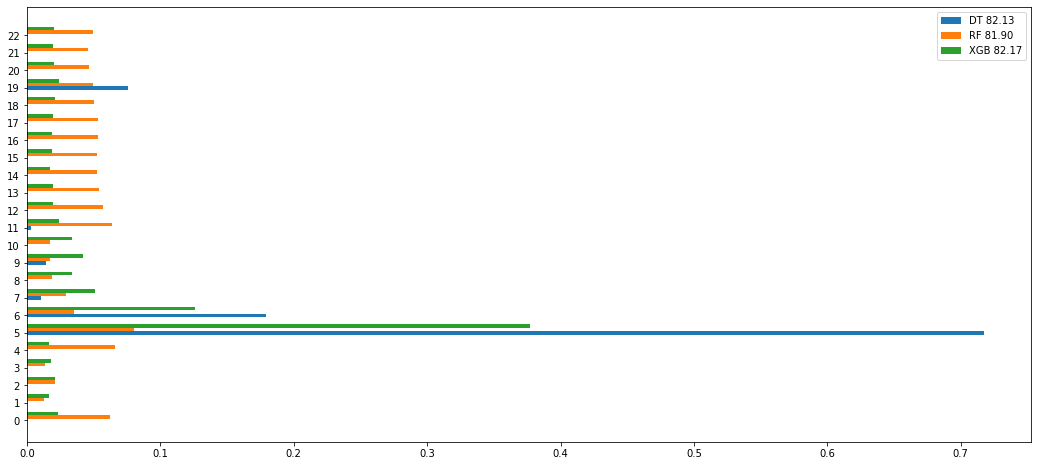

In [17]:
ccols = cdf.columns
#cdf.sort_values(by="dt", inplace=True)
fig, ax = plt.subplots(figsize=(18,8))
index = np.arange(len(cdf))
offset = 0.2
for i in np.arange(len(ccols)):
    ax.barh(index+i*offset, cdf[ccols[i]], offset,label=ccols[i])
ax.set(yticks=index,yticklabels=cdf.index)
ax.legend()
plt.show()

In [18]:
# shuffle training data
from sklearn.utils import shuffle
#X_train2, y_train2 = shuffle(X_train, y_train_nn, random_state=42)
X_train2, y_train2 = shuffle(X_train, y_train, random_state=42)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

n_features = X_train.shape[1]
# define model
model_nn = Sequential()
model_nn.add(Dense(20, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
#model_nn.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model_nn.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model_nn.add(Dense(1, activation='sigmoid'))
# compile the model
print(model_nn.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 20)                480       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 11        
Total params: 701
Trainable params: 701
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# fit the model
start = time.time()
model_nn.fit(X_train, y_train, epochs=10, batch_size=32)
time_nn = time.time() - start


Epoch 1/100
844/844 [==============================] - 1s 1ms/step - loss: 558.7175 - accuracy: 0.6808
Epoch 2/100
844/844 [==============================] - 1s 1ms/step - loss: 95.6233 - accuracy: 0.6657
Epoch 3/100
844/844 [==============================] - 1s 1ms/step - loss: 42.4224 - accuracy: 0.7445
Epoch 4/100
844/844 [==============================] - 1s 2ms/step - loss: 24.4529 - accuracy: 0.7488
Epoch 5/100
844/844 [==============================] - 1s 1ms/step - loss: 7.8817 - accuracy: 0.7720
Epoch 6/100
844/844 [==============================] - 1s 1ms/step - loss: 1.7523 - accuracy: 0.7779
Epoch 7/100
844/844 [==============================] - 1s 2ms/step - loss: 1.2796 - accuracy: 0.7781
Epoch 8/100
844/844 [==============================] - 1s 1ms/step - loss: 1.1701 - accuracy: 0.7786
Epoch 9/100
844/844 [==============================] - 1s 1ms/step - loss: 0.9437 - accuracy: 0.7786
Epoch 10/100
844/844 [==============================] - 1s 2ms/step - loss: 0.7627 - a

844/844 [==============================] - 1s 2ms/step - loss: 0.5282 - accuracy: 0.7788
Epoch 82/100
844/844 [==============================] - 1s 1ms/step - loss: 0.5282 - accuracy: 0.7788
Epoch 83/100
844/844 [==============================] - 1s 1ms/step - loss: 0.5282 - accuracy: 0.7788
Epoch 84/100
844/844 [==============================] - 1s 1ms/step - loss: 0.5282 - accuracy: 0.7788
Epoch 85/100
844/844 [==============================] - 1s 1ms/step - loss: 0.5282 - accuracy: 0.7788
Epoch 86/100
844/844 [==============================] - 1s 2ms/step - loss: 0.5282 - accuracy: 0.7788
Epoch 87/100
844/844 [==============================] - 2s 2ms/step - loss: 0.5282 - accuracy: 0.7788
Epoch 88/100
844/844 [==============================] - 1s 1ms/step - loss: 0.5282 - accuracy: 0.7788
Epoch 89/100
844/844 [==============================] - 1s 1ms/step - loss: 0.5281 - accuracy: 0.7788
Epoch 90/100
844/844 [==============================] - 1s 1ms/step - loss: 0.5282 - accuracy: 

In [33]:
# evaluate the model
loss, acc = model_nn.evaluate(X_test, y_test, verbose=0)
y_pred = model_nn.predict(X_test)
y_pred[y_pred<0.5]=0
y_pred[y_pred>=0.5]=1
print_result(y_test, y_pred)
print('Test Accuracy: %.3f' % acc)

Confusion Matrix: 
[[2341    0]
 [ 659    0]]
Accuracy :  78.03333333333333
Report : 
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      2341
           1       0.00      0.00      0.00       659

    accuracy                           0.78      3000
   macro avg       0.39      0.50      0.44      3000
weighted avg       0.61      0.78      0.68      3000

Test Accuracy: 0.780


C:\DataScience\Anaconda\envs\p37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[]

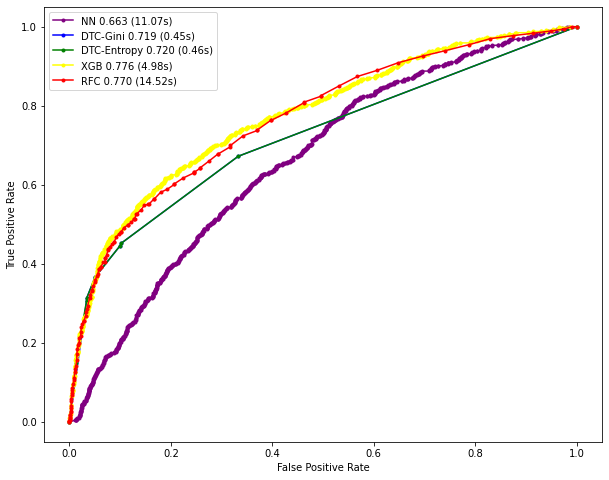

In [30]:
fig, ax = plt.subplots(figsize=(10,8))
lr_probs=model_nn.predict(X_test)
#print(lr_probs)
plotaoc(ax, lr_probs, time_nn, "NN", "purple")
lr_probs = model_gini.predict_proba(X_test)
plotaoc(ax, lr_probs, time_gini, "DTC-Gini", "blue")
lr_probs = model_dt.predict_proba(X_test)
plotaoc(ax, lr_probs, time_dt, "DTC-Entropy", "green")
lr_probs = model_xgb.predict_proba(X_test)
plotaoc(ax, lr_probs, time_xgb, "XGB", "yellow")
lr_probs = model_rfc.predict_proba(X_test)
plotaoc(ax, lr_probs, time_rfc, "RFC", "red")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.plot()